# Prediccion de supervivientes del Titanic

1. Definir el problema
2. Analizar los datos
3. Preparar los datos
4. Hacer predicciones
5. Mejorar los resultados

# 1. Definir el problema

A partir de un conjunto muestral de entrenamiento que enumera a los pasajeros que sobrevivieron al desastre del Titanic y a los que no, se debe crear un modelo que pueda determinar con base a un conjunto de test si dichos pasajeros sobreviven o no.

# 2. Analizar los datos

Antes de iniciar la exploración y procesamiento de datos es necesario importar las librerias que usaremos a lo largo de nuestro proyecto.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Gives us Graphics
import seaborn as sns #Libreria para gráficar
from sklearn.model_selection import cross_val_score #libreria para obtener puntuación de algoritmos
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Obtenemos nuestro conjunto de entrenamiento que será almacenado en la variable "titanicTrain", al mimsmo tiempo que obtenemos nuestro conjunto de prueba que será almacenado en la variable "titanicTest"

In [2]:
#firts i import the data
titanicTrain = pd.read_csv("./train.csv")
titanicTest = pd.read_csv("./test.csv")

Hacemos una inspección rapida del contenido de cada conjunto de datos.

In [3]:
titanicTrain.shape

(891, 12)

In [4]:
titanicTest.shape

(418, 11)

In [5]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanicTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanicTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Observaciones
Observando ambos conjuntos de datos podemos apreciar que el conjunto de entrenamiento cuenta con 11 columnas, mientras el de test cuenta con solo 10. Esto es porque el conjunto de test no contiene la columna "Survived" que es la que indica si el tripulante sobrevive o no, y es con base a este conjunto de datos que vamos a evaluar nuestros modelos.

También podemos hacer una suposición lógica de la importancia de las columnas (Basandonos en la gravedad del suceso). Como por ejemplo que el sexo y la edad son variables de gran importancia ya que daban prioridad a mujeres y niños. 

También podemos suponer que la variable de clase "Pclass" debe ser importante, ya que en el barco iban personas de status social bastante alto. 

El nombre no debe ser de importancia para nuestros modelos.

Y la columna "Cabin" debe ser eliminada ya que cuenta con demasiados valroes Null.

**Estas suposiciones serán verificadas más adelante**

Veamos el comportamiento de la variable a predecir "Survived"

In [9]:
titanicTrain.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [10]:
titanicTrain['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

El resultado obtenido nos indica que tan solo sobrevivieron 342 personas de las 891 que iban a bordo.

Veamoslo gráficamente:

(Para eso usaremos la librería de matplotlib asignada como plt)

Text(0.5, 1.0, 'Survived')

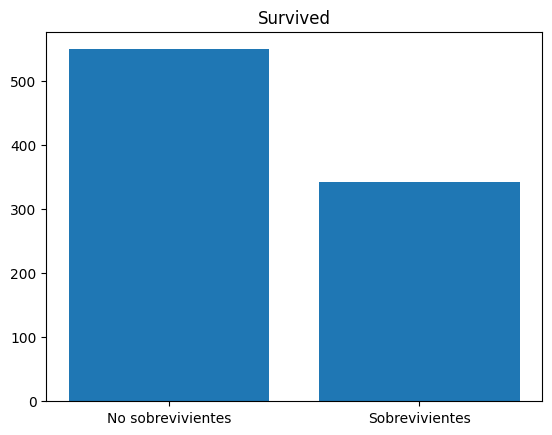

In [11]:
noSobrevivientes = titanicTrain.Survived[titanicTrain.Survived ==0].count()
sobrevivientes = titanicTrain.Survived[titanicTrain.Survived ==1].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [noSobrevivientes, sobrevivientes])
plt.title('Survived')

Text(0.5, 1.0, 'Survived')

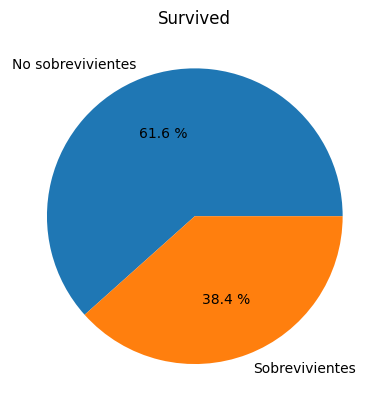

In [12]:
plt.pie(titanicTrain.Survived.value_counts(),labels=['No sobrevivientes', 'Sobrevivientes'], autopct="%0.1f %%")
plt.title('Survived')

Ya sabemos cual fue el porcentaje de sobrevivientes. Ahora veamos cual es la cantidad de mujeres que sobrevivieron

In [13]:
titanicTrain.Sex.head() #ver etiquetas

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [14]:
titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Sex.str.contains('female'))].count()

233

Esto nos arroja un resultado de 233, lo que significa que de los 342 sobrevivientes 233 son mujeres y el restante son hombres.

Ahora veamoslo gráficamente:

Text(0.5, 1.0, 'Hombres y mujeres sobrevivientes')

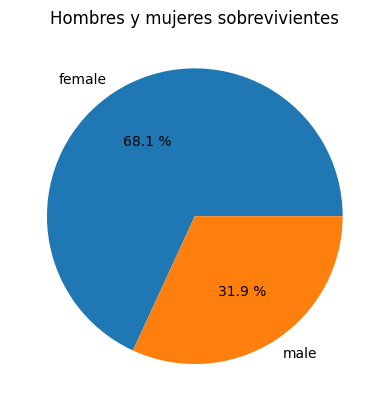

In [15]:
plt.pie([233,109], labels=['female','male'],autopct="%0.1f %%" )
plt.title('Hombres y mujeres sobrevivientes')

Con este grafico podemos ver que el 68.1% de los sobrevivientes eran mujeres y el 31,9% restante eran hombres.

Lo mismo con el diagrama de barras:

Text(0.5, 1.0, 'Sobrevivientes')

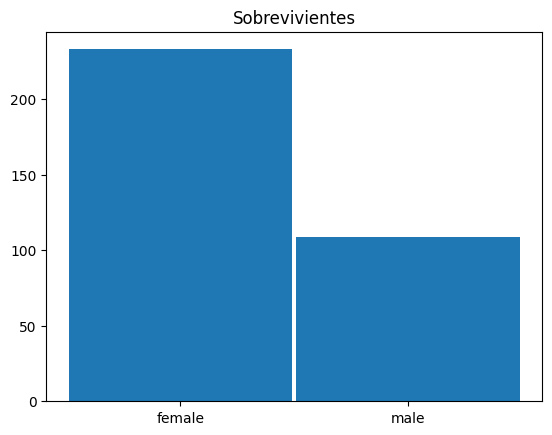

In [16]:
plt.bar(['female','male'], [233, 109], width=0.98)
plt.title('Sobrevivientes')

Una vez sabiendo cual es el porcentaje de mujeres y hombres sobrevivientes, queremos saber como se comporta la edad ante la columna "Survived". 
Para ello primero veamos qué edades tenemos en el conjunto de datos de entrenamiento.

In [17]:
titanicTrain['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Con esta descripción de la columna de edades podemos sacar conclusiones como que la edad minima es 0 años, la máxima es 80 y la edad media es de 29.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

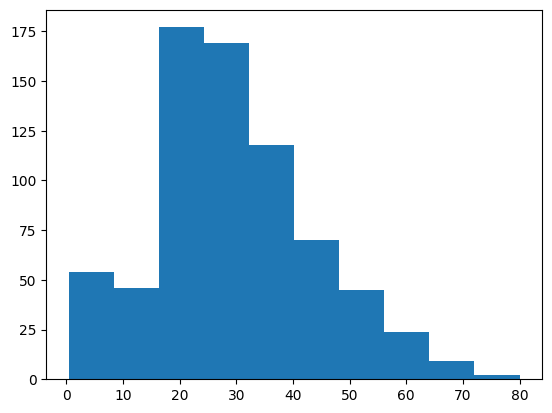

In [18]:
plt.hist(titanicTrain['Age'])

Con el gráfico podemos interpretar que en el barco viajaba una mayor cantidad de niños que de adultos mayores, que la mayor cantidad de personas abordo estaban entre los 20 y 30 años, Entre otras cosas...

Observemos la cantidad de personas menores de 20 años que sobreviven y las que no:

In [19]:
menores = titanicTrain[titanicTrain.Age < 20] #164 menores de 20 años
menores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


In [20]:
menores.Survived[menores.Survived == 1].count() #de 164 personas menores de 20, 79 sobrevivieron

79

In [21]:
menores.Survived[menores.Survived == 0].count() #de 164 personas menores de 20 años, 85 no sobrevivieron.

85

Ahora obervemos esto mismo con las personas mayores de 60 años 

In [22]:
mayores = titanicTrain[titanicTrain.Age >= 60] #26 personas tienen una edad igual o mayor a 60 años
mayores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [23]:
mayores.Survived[mayores.Survived == 1].count() #7 de las 26 personas mayores sobrevivieron

7

In [24]:
mayores.Survived[mayores.Survived == 0].count() #19 de las 26 personas mayores no sobreviven

19

Y para finalizar el analisis de la columna "Age", observemos como resulta estos datos con las personas de edad media.

In [25]:
media = titanicTrain[(titanicTrain.Age >= 20) & (titanicTrain.Age <= 30)] #245 personas tienen una edad entre 20 y 30 años
media

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [26]:
media.Survived[media.Survived == 1].count() #87 de las 245 personas de edad media sobreviven

87

In [27]:
media.Survived[media.Survived == 0].count() #158 de las 245 personas de edad media No sobreviven

158

Por último vamos a observar como se comporta la columna "Pclass" que es una de las columnas que hemos supuesto como importante ante la mortandad del accidente.

In [28]:
titanicTrain['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribución de clases en el barco')

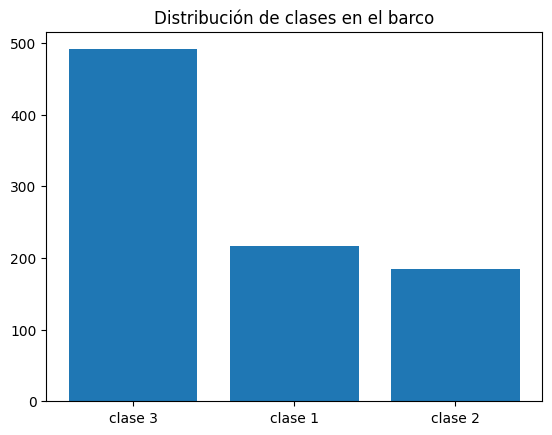

In [29]:
plt.bar(['clase 3', 'clase 1', 'clase 2'],titanicTrain['Pclass'].value_counts())
plt.title('Distribución de clases en el barco')

Con este grafico podemos observar que la clase 3 es un poco más que el doble que la clase 1. Mientras que la clase 2 es un poco menor en tamaño que la clase 1.

Ahora observemos la mortandad en cada clase.

Text(0.5, 1.0, 'Distribución de muerte en primera clase')

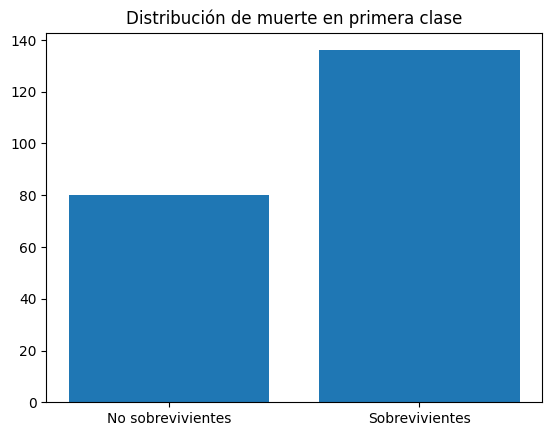

In [30]:
#Observación de primera clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 1)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 1)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [classNoSobre,classSobre])
plt.title('Distribución de muerte en primera clase')

Text(0.5, 1.0, 'Distribuación de muerte en primera clase')

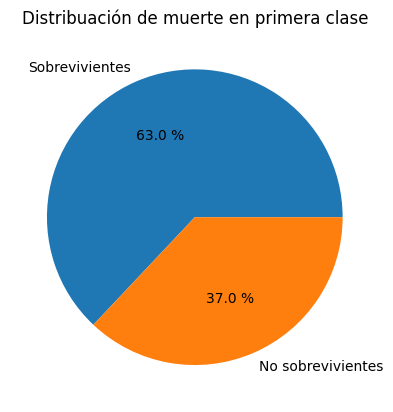

In [31]:
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en primera clase')

Text(0.5, 1.0, 'Distribuación de muerte en segunda clase')

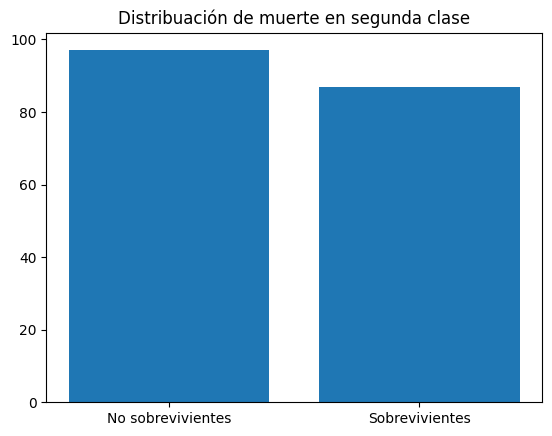

In [32]:
#Observación de segunda clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 2)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 2)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [classNoSobre,classSobre])
plt.title('Distribuación de muerte en segunda clase')

Text(0.5, 1.0, 'Distribuación de muerte en segunda clase')

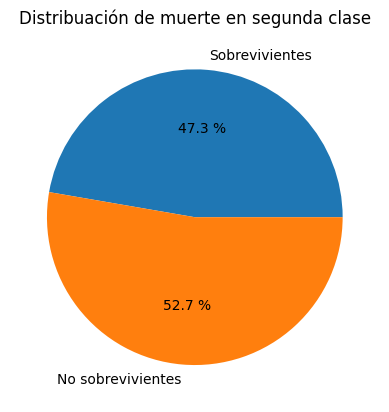

In [33]:
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en segunda clase')

Text(0.5, 1.0, 'Distribuación de muerte en tercera clase')

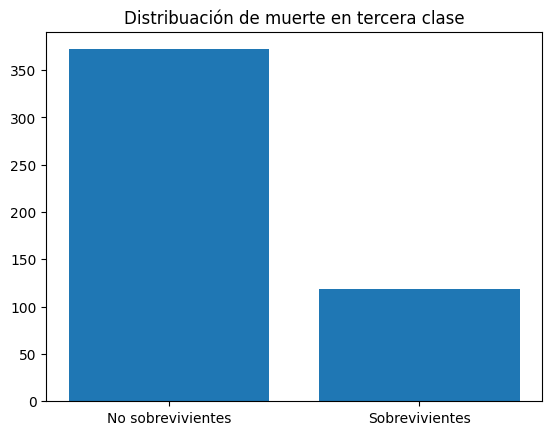

In [34]:
#Observación de tercera clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 3)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 3)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [ classNoSobre, classSobre])
plt.title('Distribuación de muerte en tercera clase')

Text(0.5, 1.0, 'Distribuación de muerte en tercera clase')

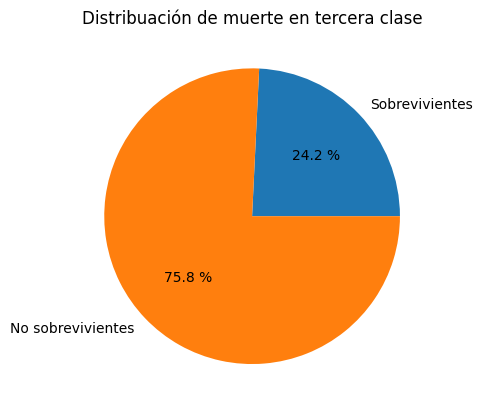

In [35]:
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en tercera clase')

Como podemos observar en las gráficas y como se podía tener una idea, la primera clase tuvo una gran cantidad de sobrevivientes (63%) en comparación con las demás clases. Mientras que en la 3ra clase solo sobrevivió un 24.2% de la tripulación, teniendo en cuenta que la cantidad de personas pertenecientes a la 3ra clase era más del doble que los de la primera clase.

Una vez habiendo analizado las columnas que creímos importantes, vamos a observar las columnas restantes. 

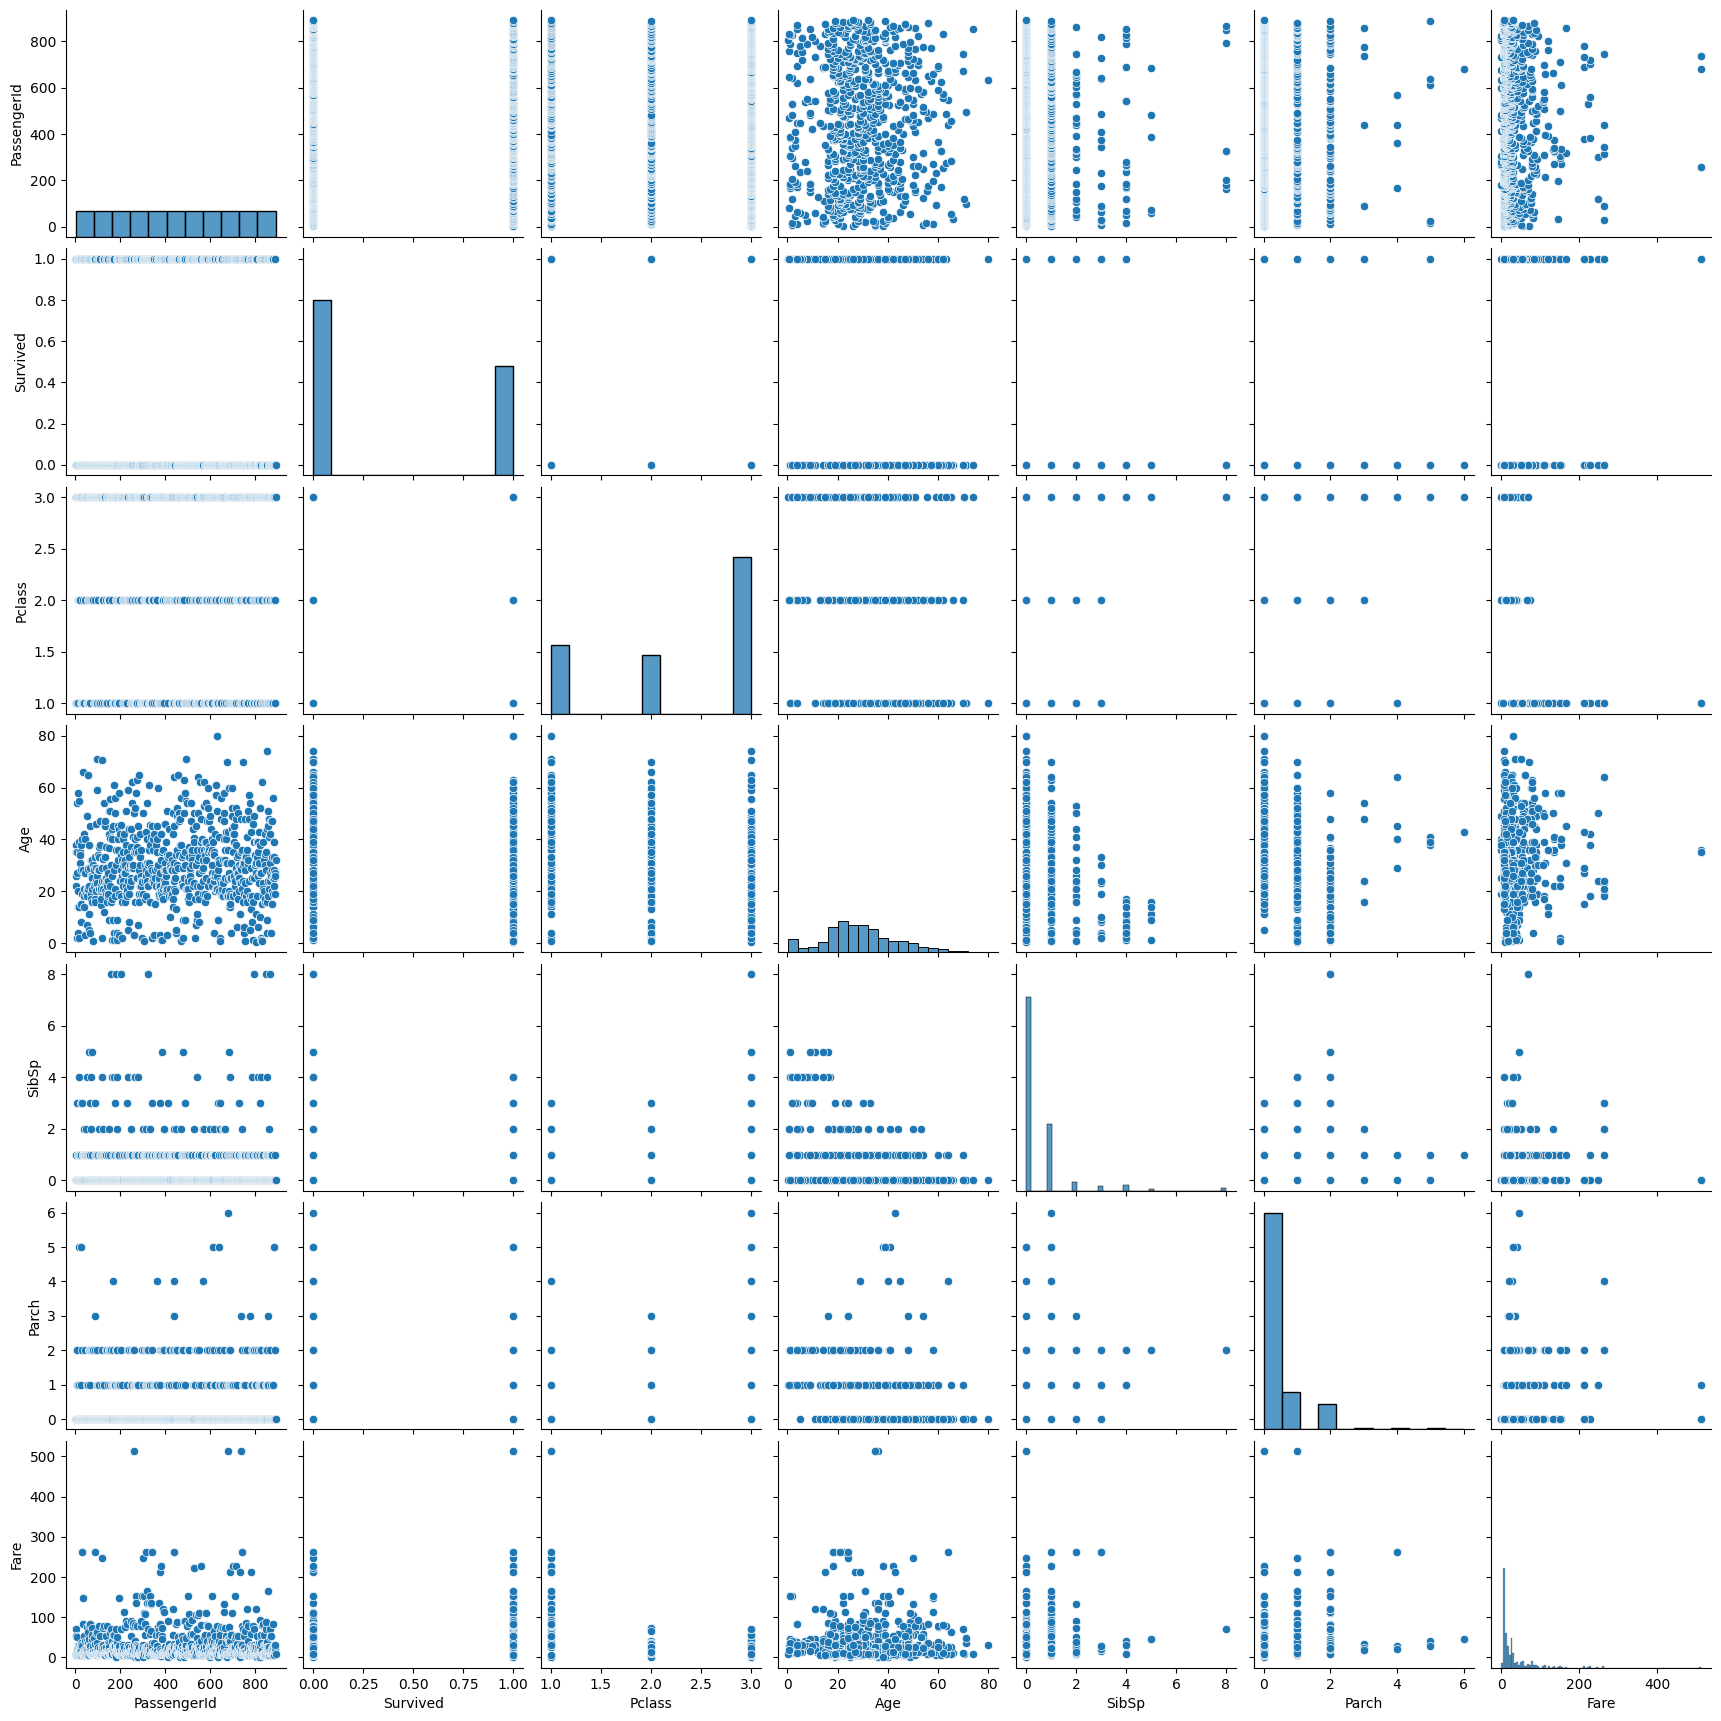

In [36]:
sns.pairplot(titanicTrain)

Con este grafico podemos observar las variables numericas que nos hace falta por explorar. Observamos que la columna "sibps" que representa el numero de hermanos o conyugues a bordo; tiene en su mayoria numero bajos, lo que quiere decir que existían pocas personas con este tipo de parentesco. 

De igual manera se observa con la columna "Parch" que representa el numero de padres e hijos a bordo; tiene en su mayoria numeros bajos. 

y por último la columna "Fare" que representa la tarifa de pasajero. Esta columna tiene numeros muy bajos, lo que tiene sentido porque la gran mayoría de la tripulación eran de la 3ra clase. Quizás esta columna tenga importacia ya que dependiendo la tarifa se puede suponer la clase o estrato de la persona. Pero es algo que veremos en un grafico más adelante.

Falta por observar las caolumnas etiquetadas como Cabin, Embarked y Ticket. Observemos:

In [37]:
titanicTrain[['Cabin','Ticket','Embarked']]

,Cabin,Ticket,Embarked
0,NaN,A/5 21171,S
1,C85,PC 17599,C
2,NaN,STON/O2. 3101282,S
3,C123,113803,S
4,NaN,373450,S
...,...,...,...
886,NaN,211536,S
887,B42,112053,S
888,NaN,W./C. 6607,S
889,C148,111369,C


In [38]:
#Observemos la columna Cabin
titanicTrain['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [39]:
titanicTrain['Cabin'].isnull().sum()

687

De 891 registros, la columna Cabin contiene 687 valores nulos, lo que significa que debemos eliminarla por su gran cantidad de datos vacios. 

In [40]:
titanicTrain.drop('Cabin', axis = 1, inplace=True)
titanicTest.drop('Cabin', axis = 1, inplace=True)

In [41]:
#Observemos la columna Ticket
titanicTrain['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [42]:
#Observemos la columna Cabin
titanicTrain['Ticket'].isnull().sum()

0

Esta columna tiene sus registros completos, pero no creo que por el ticket de una persona se pueda decidir si alguien sobrevive o no sobrevive. Sin embargo, se podrá ver la relación que tiene esta columna con nuestro Target (Objetivo de predecir supervivencia o no) en un grafico más adelante. 

In [43]:
#veamos la columna Embarked
titanicTrain['Embarked'].isnull().sum()

2

In [44]:
titanicTrain['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Como vemos, la columna "Embarked" tiene dos registros faltantes que no representan ningún problema. Se pueden eliminar estas dos filas o llenarlas con el promedio de la embarcación. Tambien vemos que existen 3 embarcaciones: S,C,Q y con base a esto nos podemos preguntar ¿La embarcación representó un factor para la supervivencia de los tripulantes ? ¿Como se presenta la mortandad en cada una de las embarcaciones? Vamos a responder estas preguntas.

Text(0.5, 1.0, 'Mortalidad de la embarcación S')

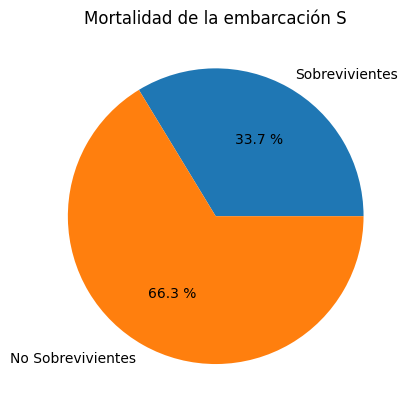

In [45]:
#Embarked S
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('S'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('S'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%")
plt.title('Mortalidad de la embarcación S')

Text(0.5, 1.0, 'Mortalidad de la embarcación C')

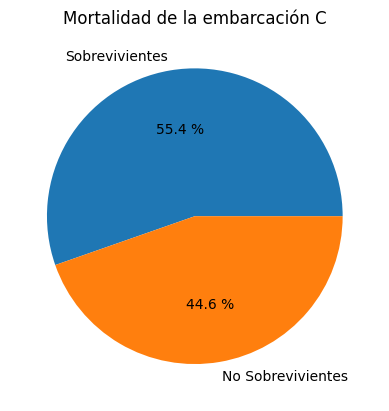

In [46]:
#Embarked C
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('C'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('C'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%")
plt.title('Mortalidad de la embarcación C')

Text(0.5, 1.0, 'Mortalidad de la embarcación Q')

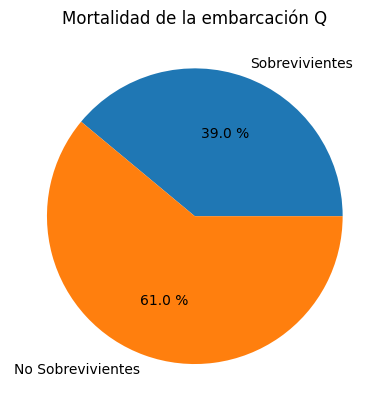

In [47]:
#Embarked Q
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('Q'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('Q'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%")
plt.title('Mortalidad de la embarcación Q')

Con estas gráficas podemos darnos una idea de la mortaldiad correspondiente a cada embarcación. A simple vista podemos ver que la mortalidad en cada una de ellas se da de manera común, por lo tanto no hay indicio de que pertenecer a cierta embarcación tuviera conseciencia en sobrevivir o no al hundimiento del barco. Pero no podemos descartarla aún. 

En cuanto a las columnas de "PassengerId", "Name" y "Ticket" las descartaremos ya que estas columnas de tipo Object dificilmente se pueden pasar a tipo numerico, y además no podrían aportar nada a nuestros modelos.

In [48]:
titanicTrain.drop(['PassengerId','Name', "Ticket"], axis = 1, inplace = True)
titanicTest.drop(['PassengerId','Name', "Ticket"], axis = 1, inplace = True)

In [49]:
print(titanicTrain)
print(titanicTest)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0   

Una vez hemos visto el comportamiento de cada una de las columnas de nuestros datos; vamos a observar la correlación de ellas con nuestro target "Survived". Pero como esta correlación solo se puede dar con variables de tipo numerico, debemos transformar las variables "Sex" y "Embarked" que son categoricas a variables numericas.

In [50]:
#conjunto de test
titanicTrain['Sex'].replace(['male','female'],[0,1], inplace = True)
titanicTrain['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)

#conjunto de test
titanicTest['Sex'].replace(['male','female'],[0,1], inplace = True)
titanicTest['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)

C:\Users\guerr\AppData\Local\Temp\ipykernel_26252\1492280398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicTrain['Sex'].replace(['male','female'],[0,1], inplace = True)
C:\Users\guerr\AppData\Local\Temp\ipykernel_26252\1492280398.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titan

In [51]:
titanicTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0
887,1,1,1,19.0,0,0,30.0000,1.0
888,0,3,1,NaN,1,2,23.4500,1.0
889,1,1,0,26.0,0,0,30.0000,2.0


In [52]:
titanicTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,NaN,0,0,8.0500,1


Ahora si podemos usar nuestro cuadro de correlación gracias a la libreria seaborn que hemos implementado al inicio de nuestro código.

<Axes: >

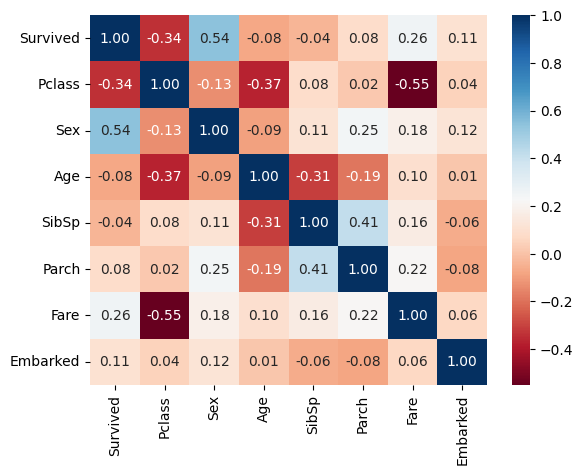

In [53]:
corr = titanicTrain.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

y acá podemos ver los porcentajes ordenados de manera descendente:

In [54]:
corr[['Survived']].sort_values(by = 'Survived',ascending = False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.108669
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


Como podemos observar, los coeficientes de correlación con respecto a nuestro target son demasiado bajos, pero debemos trabajar con ellos. La puntuación más alta es la de "Sex" que corresponde a un 54% de correlación, por tal motivo necesitaremos esa columna para entrenar nuestros algoritmos.

La columna "Fare" es la puntuación más alta por debajo de la columna "Sex" con un 25% de correlación. Pero si nos situamos en la intersección entre la columna "Fare" y la columna "Pclass" podemos ver que entre estas dos variables existe una relación negativa de un 55%,lo que significa que en esa medida las dos columnas representan lo mismo y una de las dos es innecesaria. Por tal motivo vamos a eliminar la columna "Fare" y nos quedaremos con la columna "Plcass" ya que tiene una mayor relación con nuestra columna "Survived". *(Las relaciones son independiente del signo, por tal motivo puede existir un porcentaje de correlación con ambos signos y representar el mismo nivel de relación)*

Seguido de esto usaremos la columna "Embarked" que tiene un 10% de relación.  

Por último eliminaremos las columnas "Parch" y "SipSp" ya que haciendo un análisis mental (sin soporte estadistico) considero que tener lazos familiares no aporta en gran medida a la supervivencia de una persona. Sin embargo, NO eliminaremos la columna de "Age" a pesar de tener una correlación tan baja, ya que se debió tener mayor prioridad en salvar a niños que a personas adultas.

De tal manera nuestros conjuntos de datos  quedan de la siguiente manera: 

In [55]:
titanicTrain = titanicTrain.loc[:,['Sex','Pclass','Age','Embarked','Survived']]
titanicTest = titanicTest.loc[:,['Sex','Pclass','Age','Embarked']]
titanicTrain, titanicTest

(     Sex  Pclass   Age  Embarked  Survived
 0      0       3  22.0       1.0         0
 1      1       1  38.0       2.0         1
 2      1       3  26.0       1.0         1
 3      1       1  35.0       1.0         1
 4      0       3  35.0       1.0         0
 ..   ...     ...   ...       ...       ...
 886    0       2  27.0       1.0         0
 887    1       1  19.0       1.0         1
 888    1       3   NaN       1.0         0
 889    0       1  26.0       2.0         1
 890    0       3  32.0       3.0         0
 
 [891 rows x 5 columns],
      Sex  Pclass   Age  Embarked
 0      0       3  34.5         3
 1      1       3  47.0         1
 2      0       2  62.0         3
 3      0       3  27.0         1
 4      1       3  22.0         1
 ..   ...     ...   ...       ...
 413    0       3   NaN         1
 414    1       1  39.0         2
 415    0       3  38.5         1
 416    0       3   NaN         1
 417    0       3   NaN         2
 
 [418 rows x 4 columns])

Una vez hecho nuestro análisis y seleccionado nuestras características, estamos listos para seguir con nuestra siguiente etapa de preprocesamiento de datos.

# 3. Preparar los datos

En esta etapa se suele hacer el siguiente preprocesamiento: 
1. Transformar variables categóricas a numéricas.
2. Tratar los datos faltantes.
3. Tratar los datos atípicos.
4. Considerar el escalado de los datos.


1. Para nuestro primer punto no debemos hacer ninguna transformación ya que en el proceso de análisis fuimos tranformando las columnas necesarias para nuestra observación y ahora todo nuestro conjunto de datos es de tipo numérico.
2. **Tratar los datos faltantes**. En este punto si debemos analizar cada columna para ver la cantidad de datos que faltan en cada una de ellas y como tratarlos.

In [56]:
print(titanicTrain['Sex'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(titanicTest['Sex'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [57]:
print(titanicTrain['Pclass'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(titanicTest['Pclass'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [58]:
print(titanicTrain['Age'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento 
print(titanicTest['Age'].isnull().sum()) #Cantidad de valores vacíos en test

177
86


In [59]:
print(titanicTrain['Embarked'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento 
print(titanicTest['Embarked'].isnull().sum()) #Cantidad de valores vacíos en test

2
0


In [60]:
print(titanicTrain['Survived'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento

0


Teniendo en cuenta que las columnas "Age" y "Embarked" tiene valores vacíos vamos a tratarlos.

La columna "Age" tiene 177 valores faltantes de 891. Existen distintas formas de rellenar estos valore faltantes, pero en esta ocación los llenaremos con el valor promedio de edades.

In [61]:
promedio = titanicTrain['Age'].mean()
titanicTrain['Age'].fillna(promedio, inplace = True)
print(titanicTrain['Age'].isnull().sum())

#Ahora con el conjunto de prueba
promedio = titanicTest['Age'].mean()
titanicTest['Age'].fillna(promedio, inplace = True)
print(titanicTest['Age'].isnull().sum())

0
0


C:\Users\guerr\AppData\Local\Temp\ipykernel_26252\2767540687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicTrain['Age'].fillna(promedio, inplace = True)
C:\Users\guerr\AppData\Local\Temp\ipykernel_26252\2767540687.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

De esta manera hemos rellenado los valores vacíos de la columna "Age" con el promedio de edad. Ahora nos falta la columna "Embarked" el cual tiene 2 registros faltantes de 891. En este caso vamos a rellenar estos dos valores vacíos con el numero que más se repite.

In [62]:
titanicTrain['Embarked'].value_counts()

Embarked
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

In [63]:
titanicTrain['Embarked'].fillna(1, inplace = True)
print(titanicTrain['Embarked'].isnull().sum())

0


C:\Users\guerr\AppData\Local\Temp\ipykernel_26252\3432825409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicTrain['Embarked'].fillna(1, inplace = True)


In [64]:
print(titanicTrain.info())
print(titanicTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.2 KB
None


Ahora ya no tenemos valores vacíos en nuestro conjunto de datos, hemos terminado el segundo punto y podemos seguir con nuestro preprocesamiento de datos.

3.  **Tratar los datos atípicos.**
Para este punto solo debemos centrarnos en la columna "Age" ya que las demás columnas son categóricas y no tienen mayor variedad de números, de esta manera no existe riesgo de valores Outliers.

<Axes: ylabel='Age'>

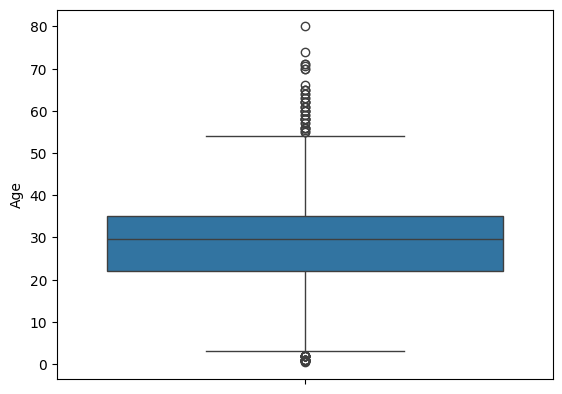

In [65]:
sns.boxplot(titanicTrain['Age'])

Esta gráfica nos muestra algunos puntos de ánalisis, el cuartil inferior que es un poco mayor a 20, la media que es 30 y el cuartil superior que está al rededor de 35. los bigotes (lineas verticales de los lados) exponen que todo numero que esté dentro de estos limites se consideran normales, mientras que los que están por fuera se consideran datos atípicos. En este caso se consideran datos atípicos las edades inferiores a 3 y superiores a 53 aproximadamente. Dependiendo del caso se deberían eliminar estos datos para que no afecten el rendimiento de nuestros agoritmos, pero en esta ocación no es necesario, ya que sí es posible que una persona de 70 u 80 años estuviera en el bote, o un bebé de apenas 1 año de edad. Caso contrario sería de una persona de 150 o 200 años, o alguien con -3 años, en ese momento si se deberían eliminar dichos registros ya que es ilógico que un caso así se presente.  

Una vez considerado los datos Outliers podemos seguir con nuestro último paso de escalado de datos.

4. **Considerar el escalado de los datos**. El escalado de los datos se debe realizar cuando existen columnas con diferencias de valores muy altos, como por ejemplo el valor de un apartamento (200000000) y el numero de habitaciones de este (4). El escalado se hace precisamente para reducir esta diferencia y poder dar los mejores resultados con nuestros algoritmos. Como nuestro problema es de clasificación y no presentamos diferencias en nuestros valores de columnas, entonces no es necesario hacer el escalado de los datos. 

Con esto último hemos terminado nuestro proceso de pre-procesamiento y ya tenemos listos nuestros datos para poder entrenar nuestros modelos de la mejor manera. 

In [66]:
titanicTrain

,Sex,Pclass,Age,Embarked,Survived
0,0,3,22.000000,1.0,0
1,1,1,38.000000,2.0,1
2,1,3,26.000000,1.0,1
3,1,1,35.000000,1.0,1
4,0,3,35.000000,1.0,0
...,...,...,...,...,...
886,0,2,27.000000,1.0,0
887,1,1,19.000000,1.0,1
888,1,3,29.699118,1.0,0
889,0,1,26.000000,2.0,1


In [67]:
titanicTest

,Sex,Pclass,Age,Embarked
0,0,3,34.50000,3
1,1,3,47.00000,1
2,0,2,62.00000,3
3,0,3,27.00000,1
4,1,3,22.00000,1
...,...,...,...,...
413,0,3,30.27259,1
414,1,1,39.00000,2
415,0,3,38.50000,1
416,0,3,30.27259,1


# 4. Hacer predicciones

En esta etapa entrenaremos nuestros modelos con la data previamente procesada y haremos nuestras predicciones. Utilizaremos modelos de clasificación tales como :

* Logistic Regression
* KNN o k-Nearest Neighbors
* SVM o Support Vector Machine
* Naive Bayes classifier
* Decision Tree
* Random Forrest

Compararemos y mejoraremos los resultados.

In [68]:
y_train = titanicTrain.loc[:, 'Survived']
x_train = titanicTrain.drop('Survived', axis = 1)
x_test = titanicTest

In [69]:
#Regresión logistica
from sklearn.linear_model import LogisticRegression #Importamos la librería del modelo

clasificador = LogisticRegression(random_state = 0)
clasificador.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) # metodo para obtener la precisión (Validación cruzada)
cvRegression = cv.mean()
stdRegression = cv.std()
print("promedio Validación cruzada Regresión logística: ", cvRegression)
print('Varianza de Regresión logística: ',stdRegression)

promedio Validación cruzada Regresión logística:  0.7878901373283396
Varianza de Regresión logística:  0.012539826998339465


In [70]:
#KNN o k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier #Importamos la librería del modelo

clasificador = KNeighborsClassifier()
clasificador.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvKnn = cv.mean()
stdKnn = cv.std()
print("promedio Validación cruzada KNN: ", cvKnn)
print('Varianza de KNN: ',stdKnn)

promedio Validación cruzada KNN:  0.7666042446941324
Varianza de KNN:  0.030009911065600806


In [71]:
#SVM o Support Vector Machine
from sklearn.svm import SVC #Importamos la librería del modelo
#Para implementar el modelo de SVM es obligatorio tener los datos escalados
from sklearn.preprocessing import StandardScaler #Libreria para escalar los datos

scaler = StandardScaler()
x_entrenamiento = scaler.fit_transform(x_train) #Escalar los datos de entrenamiento
x_prueba = scaler.fit_transform(x_test)

clasificador = SVC(random_state = 0) 
clasificador.fit(x_entrenamiento, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_prueba) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvSVM = cv.mean()
stdSVM = cv.std()
print("promedio Validación cruzada SVM: ", cvSVM)
print('Varianza de SVM: ',stdSVM)

promedio Validación cruzada SVM:  0.6352808988764045
Varianza de SVM:  0.0245767093935616


In [72]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB #Importamos la librería del modelo

clasificador = GaussianNB()
clasificador.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvNB = cv.mean()
stdNB = cv.std()
print("promedio Validación cruzada NB: ", cvNB)
print('Varianza de NB: ',stdNB)

promedio Validación cruzada NB:  0.782247191011236
Varianza de NB:  0.02774985200095652


In [73]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier #Importamos la librería del modelo

clasificadorTree = DecisionTreeClassifier(random_state = 0)
clasificadorTree.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificadorTree.predict(x_test) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificadorTree, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvTree = cv.mean()
stdTree = cv.std()
print("promedio Validación cruzada Decision Tree: ", cvTree)
print('Varianza de Decision Tree: ',stdTree)

promedio Validación cruzada Decision Tree:  0.7924719101123595
Varianza de Decision Tree:  0.03751547254759878


In [74]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier #Importamos la librería del modelo

clasificadorForest = RandomForestClassifier(random_state = 0)
clasificadorForest.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificadorForest.predict(x_test) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificadorForest, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvForest = cv.mean()
stdForest = cv.std()
print("promedio Validación cruzada Random Forest: ", cvForest)
print('Varianza de Random Forest: ',stdForest)

promedio Validación cruzada Random Forest:  0.8025967540574281
Varianza de Random Forest:  0.044664299321545496


In [75]:
#score = [scoreRegression, scoreKnn, scoreSVM, scoreNB, scoreTree, scoreForest]
meanValidaCruz = [cvRegression, cvKnn, cvSVM, cvNB, cvTree, cvForest]
stdValidaCruz = [stdRegression, stdKnn, stdSVM, stdNB, stdTree, stdForest]
labels = ['Regresion lineal', 'Knn', 'SVM', 'Naive Bayes', 'Árbol de decision', 'Random Forest']

scoreModels = pd.DataFrame({'Models': labels,
                            'Vali. Cruz.': meanValidaCruz,
                            'Varianza': stdValidaCruz})
scoreModels.sort_values(by = 'Vali. Cruz.', ascending = False)

,Models,Vali. Cruz.,Varianza
5,Random Forest,0.802597,0.044664
4,Árbol de decision,0.792472,0.037515
0,Regresion lineal,0.787890,0.012540
3,Naive Bayes,0.782247,0.027750
1,Knn,0.766604,0.030010
2,SVM,0.635281,0.024577


Text(0.5, 1.0, 'Puntuaciones')

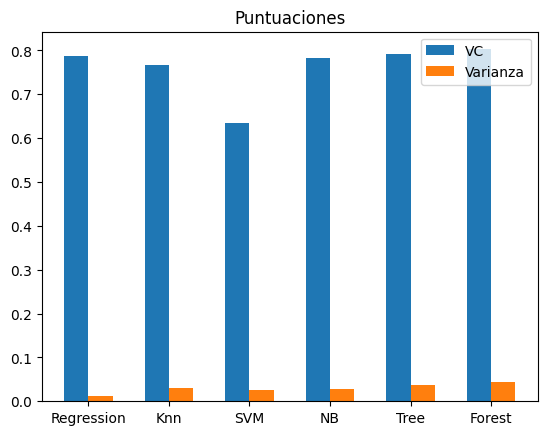

In [76]:
width = 0.30
ind =np.arange(6)
plt.bar(ind ,meanValidaCruz, width, label='VC')
plt.bar(ind + width,stdValidaCruz, width, label='Varianza')
#plt.bar(ind + width*2,score, width, color='r', label='Score')
plt.xticks(ind + width/2,('Regression', 'Knn', 'SVM', 'NB', 'Tree','Forest'))
plt.legend()
plt.title("Puntuaciones")

Ahora que sabemos la precisión de cada modelo debemos mejorar las puntuaciones obtenidas. Como los modelos Random Forest y Árbol de decisión presentaron los mejores resultados; nos enfocaremos en optimizar dichos modelos. Para esto haremos uso de la librería GridSearchCV de Sklearn que nos permite hallar los mejores parametros para implementar nuestros algoritmos. 

# 5. Mejorar los resultados

In [77]:
#GirdSearchCV con el modelo de árbol de decisión

from sklearn.model_selection import GridSearchCV #Importamos la librería

minSplit = np.arange(20,26,1)
maxDepth = np.arange(4.0,4.6,0.1)

parametros = [{'criterion': ['gini'],'max_depth': [3.5,4.1], 'min_samples_split': minSplit},
              {'criterion': ['entropy'], 'max_depth':  [3.5,4.1], 'min_samples_split':  minSplit}
             ] #Definimos los parametros para que la librería nos indique cuál es el mejor

gridSearch = GridSearchCV(estimator = clasificadorTree, 
                          param_grid = parametros,
                          scoring = 'accuracy',
                          cv = 10) #En el constructor pasamos el modelo que queremos mejorar, los parametros, medida de calificacion y nuemero de pruebas.

gridSearch = gridSearch.fit(x_train, y_train) #Entrenamos el GridSearchCV
print(gridSearch.best_score_) #vemos como la puntuación cv pasó de 0.7924 a  0.8215
print(gridSearch.best_params_) #Muestras los parametros más optimos


#Aplicacion de parametros
clasificadorTree = DecisionTreeClassifier(criterion= 'gini', 
                                          max_depth= 4.1,min_samples_split = 21,
                                          random_state = 0)

clasificadorTree.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificadorTree.predict(x_test) #Hacemos predicciones sobre el conjunto de test

scoreTreeGS = clasificadorTree.score(x_train, y_train) #Obtenemos la precisión del algoritmo
print('Precisión de algoritmo de Decision Tree: ',scoreTreeGS)

cv = cross_val_score(estimator = clasificadorTree, X = x_train, y = y_train, cv = 10) #Metodo para obtener la precisión
cvTreeGS = cv.mean()
stdTreeGS = cv.std()
print("promedio Validación cruzada Decision Tree: ", cvTreeGS)
print('Varianza de Decision Tree: ',stdTreeGS)



ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of DecisionTreeClassifier must be an int in the range [1, inf) or None. Got 3.5 instead.

--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of DecisionTreeClassifier must be an int in the range [1, inf) or None. Got 4.1 instead.


In [ ]:
#Cuadro comparativo de resultados
defectpVsGSTree = pd.DataFrame({'Parametros. Árbol de Decisión':['Por Defecto', 'GridSearchCV'],
                                'Mean Vali. Cruz.':[cvTree,cvTreeGS ],
                                'Varianza': [stdTree, stdTreeGS]})

defectpVsGSTree

In [ ]:
#GirdSearchCV con el modelo de bosques aleatorios

nEstimators = np.arange(80,86)
maxDepth = np.arange(4.0,4.3,0.1)

#best'max_features': ['auto'],
#best'criterion' :['entropy']
parametros = { 
    'n_estimators': nEstimators,
    'max_depth' :  maxDepth,
}#Definimos los parametros que para que la librería nos indique cuál es el mejor

gridSearch = GridSearchCV(estimator = clasificadorForest, 
                          param_grid = parametros,
                          scoring = 'accuracy',
                          cv = 10)#En el constructor pasamos el modelo que queremos mejorar, los parametros, medida de calificacion y nuemero de pruebas.

gridSearch = gridSearch.fit(x_train, y_train) #Entrenamos el GridSearch
print(gridSearch.best_score_) #vemos como la puntuación de cv pasó de 0.8025 a 0.8237 
print(gridSearch.best_params_) #Vemos los parametros más optimos


#Aplicación de parametros 
clasificadorForest = RandomForestClassifier(max_features ='auto',
                                            criterion = 'entropy',
                                            n_estimators = 84,
                                            max_depth =  4,
                                            random_state = 0)
clasificadorForest.fit(x_train, y_train) #Entrenamos el modelo con los datos de entrenamiento 

y_pred = clasificadorForest.predict(x_test) #Hacemos predicciones sobre el conjunto de test

scoreForestGS = clasificadorForest.score(x_train, y_train) #Obtenemos la precisión del algoritmo
print('Precisión de algoritmo de Random Forest: ',scoreForestGS)

cv = cross_val_score(estimator = clasificadorForest, X = x_train, y = y_train, cv = 10) #Otro metodo para obtener la precisión
cvForestGS = cv.mean()
stdForestGS = cv.std()
print("promedio Validación cruzada Random Forest: ", cvForestGS)
print('Varianza de Random Forest: ',stdForestGS)

In [ ]:
#Cuadro comparativo de resultados
defectpVsGSForest = pd.DataFrame({'Bosques Aleatorios':['Por Defecto', 'GridSearchCV'],
                                'Mean Vali. Cruz.':[cvForest,cvForestGS],
                                'Varianza': [stdForest, stdForestGS]})

defectpVsGSForest

In [ ]:
#Cuadro comparativo de modelos
modelos = pd.DataFrame({'Modelo': ['DecisionTree', 'RandomForest'],
                      'Precision': [cvTreeGS, cvForestGS],
                       'Varianza': [stdTreeGS, stdForestGS]
                      })
modelos.sort_values(by='Precision',  ascending = False)


Con estos resultados hemos finalizado el proceso de predicción de la supervivencia de los tripulantes del titanic. 
En este punto hemos hecho un análisis, pre-procesamiento de datos, selección, entrenamiento y optimización de modelos para la solución del problema planteado. 

Hemos terminado con dos modelos que presentan los mejores resultados en comparación con los demás escogidos. Estos son: El modelo de RandomForest con una precisión del 82,26% y con una varianza del 3,5%. El otro modelo es el de DecisionTree, que presenta una precisión de 82,21% con una varianza del 3,8%

Con estas conclusiones pueden surgir preguntas como: 
1. ¿Pueden mejorar estos resultados ?
2. ¿Como podemos mejorar estos resultados ? 
3. ¿Hemos hecho una correcta selección de caracteristicas ? 
4. ¿Hemos hecho un correcto pre-procesamiento de datos ? 
5. ¿Podríamos implementar modelos que se ajusten mejor a este problema ? 

Si tiene alguna respuesta a estas preguntas podría dejarlas en un comentario, o si tiene dudas o sugerencias podría hacermelo saber para crear retroalimentación y aprender entre nosotros. 
